<center> 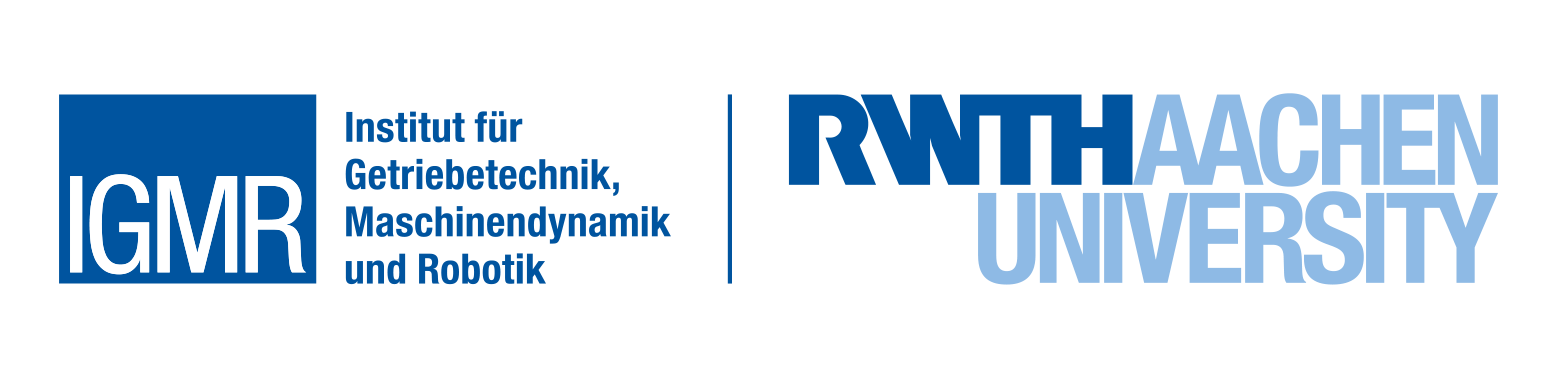 </center>
<center>
    <h1>Grundlagen der Maschinen- und Strukturdynamik</h1>
    <h1>Dynamikspielwiese</h1>
</center>

In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from functions import System, Excitation, state_space, plot_excitation, plot_time_series, plot_stft

<div style="text-align:left">
  <h2>Two Mass System</h2>
</div>
This script can be used to perform simulations on a Two-Mass-System.
Depending on the settings the system can be damped or not.
To see the results the functions for STFT, Excitation and Time Series are provided.

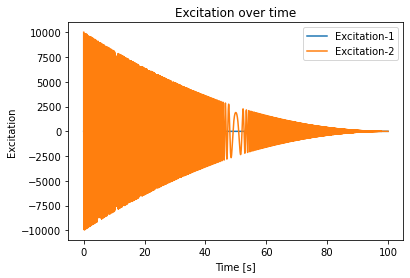

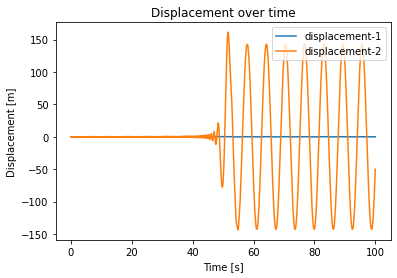

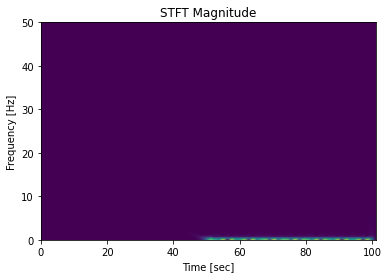

In [2]:
## Settings
PLOT_TIME_SERIES = True
PLOT_STFT = True
PLOT_EXCITATION = True
initial_values = np.array([0, 0, 0, 0])  # velocity, displacement v_2, v_1, x_2, x_1

## System Settings
twoMassSystem = System()
twoMassSystem.T_SAMPLE = 0.01  # how fine you want the time frame
twoMassSystem.T_END = 100
twoMassSystem.mass = np.array([[10, 0],
                              [0, 10]])
#twoMassSystem.damping = np.array([[1, -1],
 #                             [-1, 1]])
twoMassSystem.stiffness = np.array([[10000, -10],
                                  [-10,10]])

## Excitation Settings
excitation = Excitation(EXCITATION = "periodic",
                        FREQUENCY = "time_dependent",
                        n = 100,
                        m = -1)
excitation.f_hat = np.array([0, 0])  # x_1, x_2
excitation.u_mass = np.array([0, 1])  # x_1, x_2


if twoMassSystem.USE_STATIC_POSITION:
    """ This will overwrite the initial
    position given and uses the static position as the one. """
    initial_position = np.linalg.lstsq(twoMassSystem.stiffness, excitation.f_hat, rcond=None)[0]
    initial_values = np.concatenate((initial_values[:2], initial_position))

sol = solve_ivp(state_space, y0=initial_values,
                t_span=[0, twoMassSystem.T_END],
                t_eval=np.arange(0, twoMassSystem.T_END, twoMassSystem.T_SAMPLE),
                args=(twoMassSystem, excitation,))

if PLOT_EXCITATION: plot_excitation(twoMassSystem, excitation)

if PLOT_TIME_SERIES: plot_time_series(sol)

if PLOT_STFT: plot_stft(sol, twoMassSystem)